## Keystroke Feature Extraction

In [6]:
from dataman.audio_processing import *

from librosa import power_to_db
from librosa.feature import mfcc, melspectrogram
from librosa.display import specshow
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from scipy.signal import spectrogram

Number of keystrokes detected in "/env/datasets/keystrokes/space/space-x.wav": 124
Drawing keystrokes...


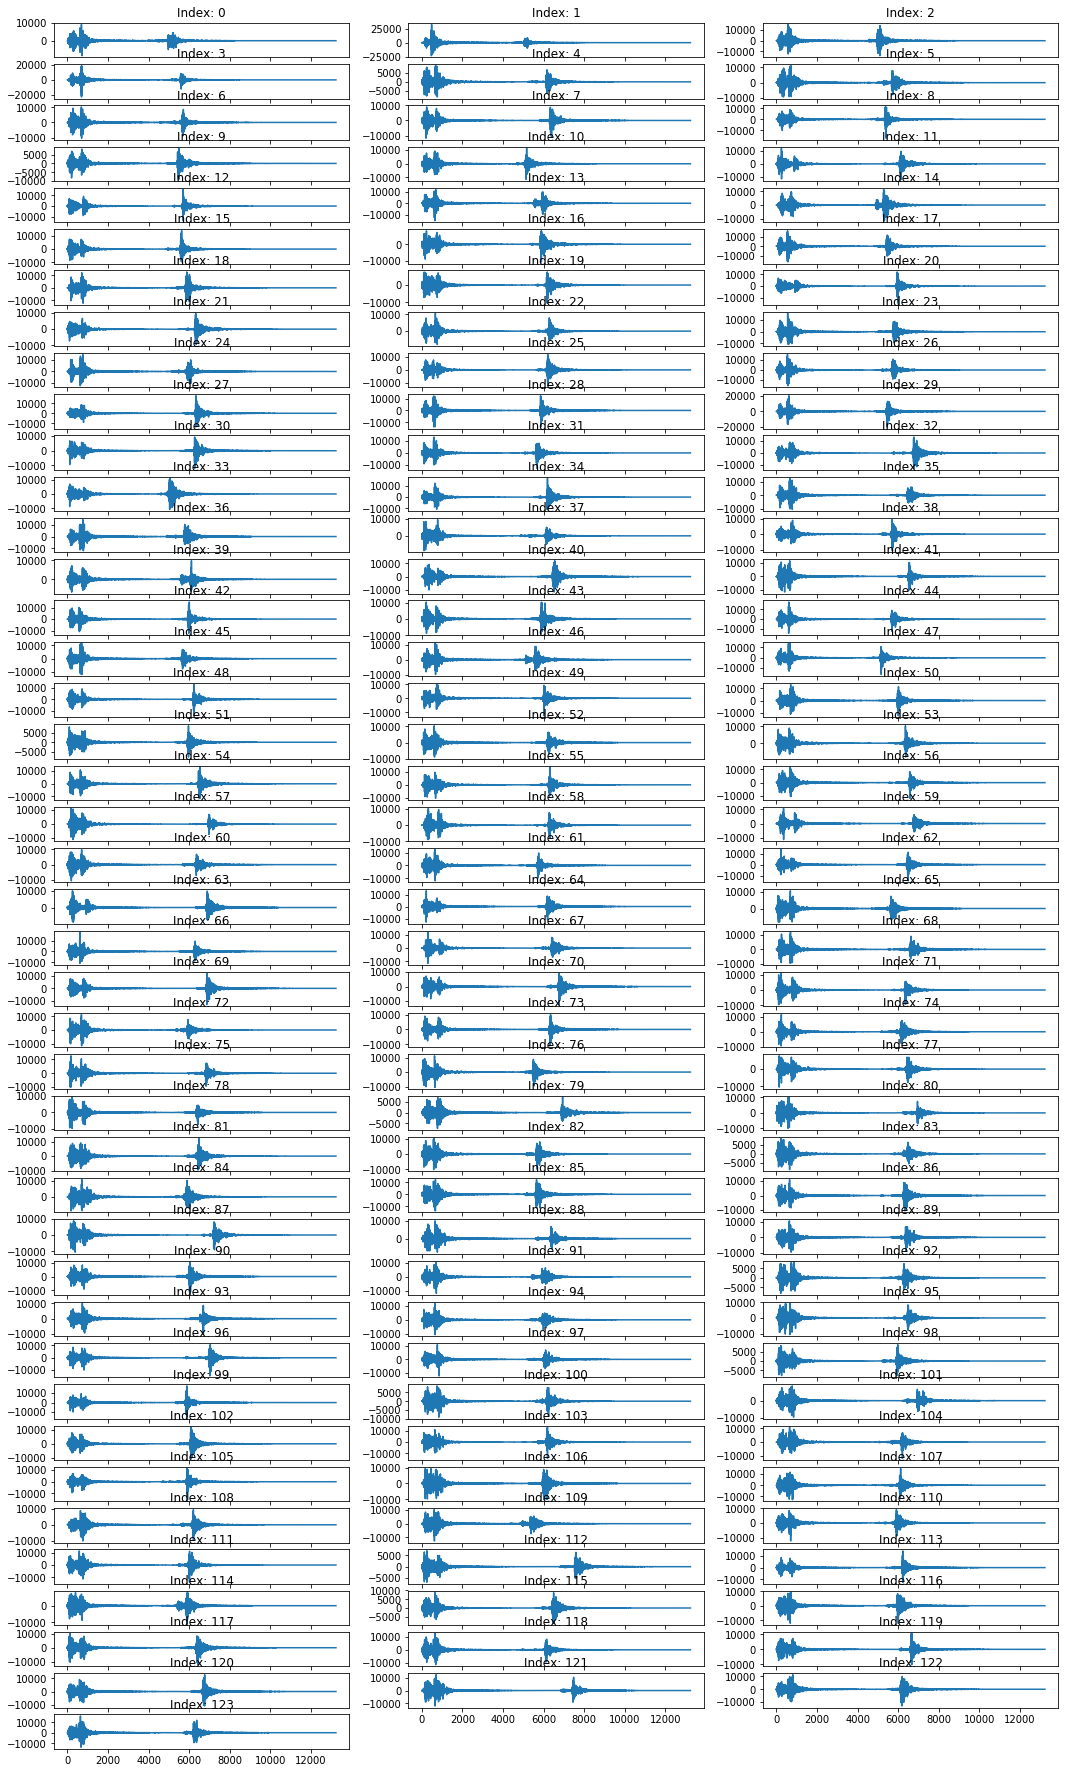

In [3]:
visualize_keystrokes('/env/datasets/keystrokes/space/space-x.wav')

In [7]:
data, labels_int, labels_str = load_keystroke_data()

In [180]:
spacebars = data[labels_str == 'space']
a_keys = data[labels_str == 'a']
q_keys = data[labels_str == 'q']
enters = data[labels_str == 'enter']

### Comparing related spectrogram functions from different libraries

In [138]:
def draw_melspectrogram(keystroke):
    plt.figure(figsize=(9.4, 3))
    plt.plot(keystroke)
    plt.title('Original Waveform')
    plt.margins(x=0)
    plt.show()
    
    sample_melspec = melspectrogram(keystroke.astype(float),
                                    sr=44100,
                                    n_fft=512,
                                    n_mels=64,)
    plt.figure(figsize=(10, 4))
    specshow(power_to_db(sample_melspec, ref=np.max),
             sr=44100,
             y_axis='mel',
             fmax=8000,
             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    plt.show()

In [77]:
def draw_specgram(keystroke):
    plt.figure(figsize=(9.4, 3))
    plt.plot(keystroke)
    plt.title('Original Waveform')
    plt.margins(x=0)
    plt.show()
    
    plt.figure(figsize=(9.4, 3))
    sample_specgram = plt.specgram(keystroke.astype(float),
                                   Fs=44100)
    plt.title('Specgram')
    plt.tight_layout()
    plt.show()

In [78]:
def draw_spectrogram(keystroke):
    plt.figure(figsize=(9.4, 3))
    plt.plot(keystroke)
    plt.title('Original Waveform')
    plt.margins(x=0)
    plt.show()
    
    plt.figure(figsize=(9.4, 3))
    f, t, Sxx = spectrogram(keystroke.astype(float),
                              fs=44100,)
    plt.pcolormesh(t, f, Sxx)
    plt.title('Specgram')
    plt.tight_layout()
    plt.show()

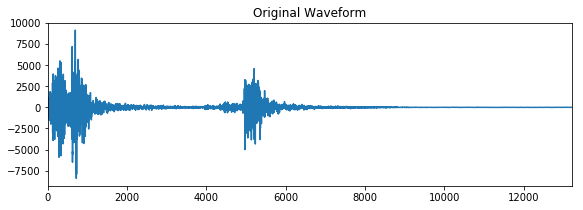

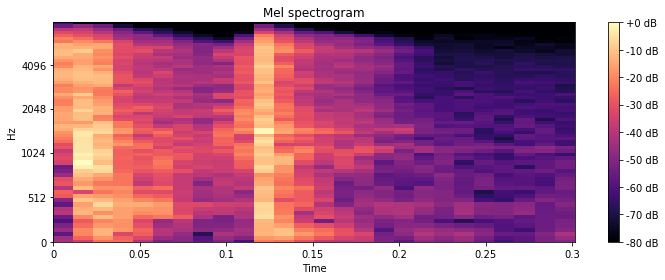

In [139]:
draw_melspectrogram(spacebars[0])

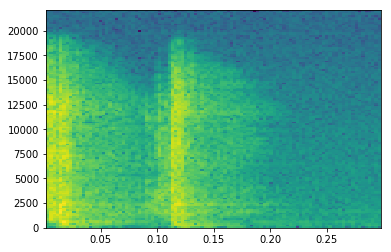

In [62]:
sample_melspec = plt.specgram(spacebars[0].astype(float), Fs=44100)

In [184]:
def extract_features(keystroke):
    """Return a frequency-based feature vector for given keystroke."""
    spec = mfcc(y=keystroke.astype(float),
                sr=44100,
                n_mfcc=16,
                n_fft=441, # n_fft=220 for 10ms window
                hop_length=110, # hop_length=110 for ~2.5ms
               )
    return spec.flatten()

In [176]:
def draw_mfcc(keystroke):
    spec = mfcc(y=keystroke.astype(float),
                sr=44100,
                n_mfcc=16,
                n_fft=441, # n_fft=220 for 10ms window
                hop_length=110, # hop_length=110 for ~2.5ms
               )
    plt.figure(figsize=(10, 4))
    specshow(spec, x_axis='time', sr=44100, hop_length=110)
    plt.colorbar()
    plt.tight_layout()

In [187]:
ret = extract_features(spacebars[0])
print(ret)
print(len(ret))

[ 4.99010805e+02  5.73421747e+02  6.24369804e+02 ...  1.40662597e-01
 -5.54916470e+00  8.15799271e-01]
1936


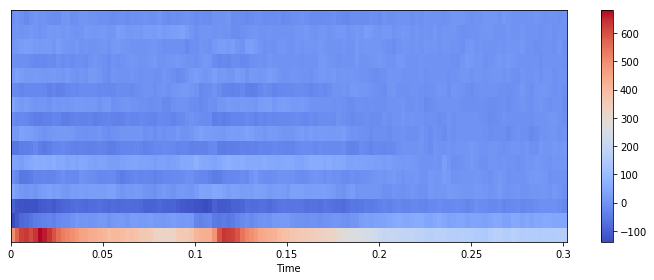

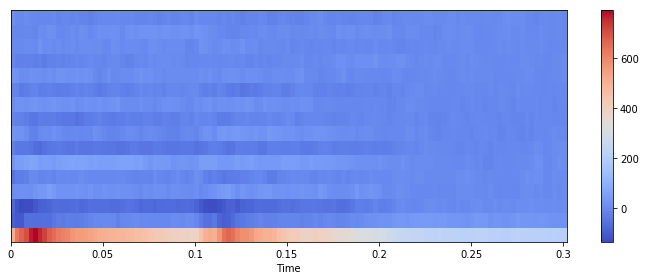

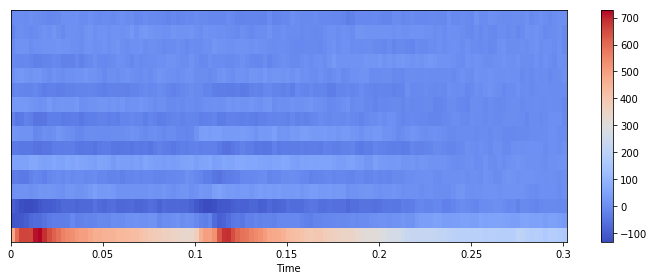

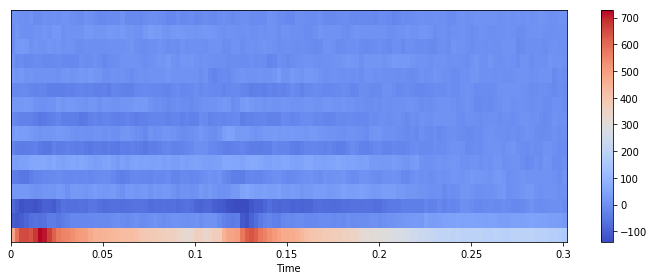

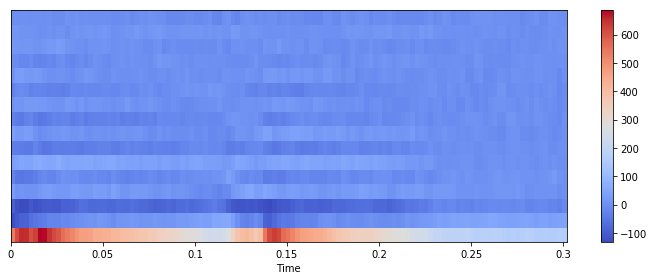

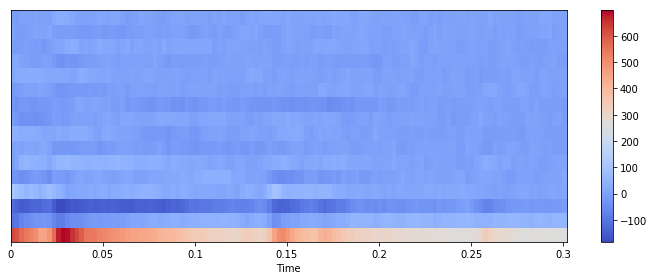

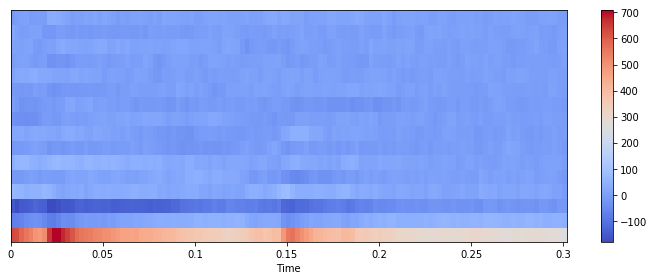

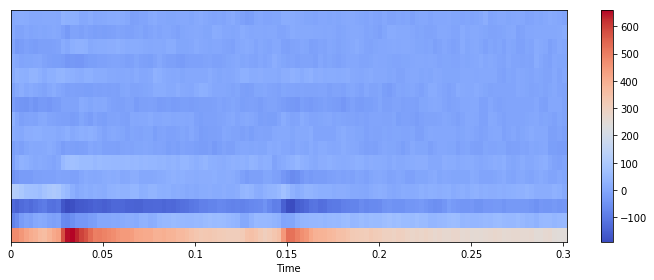

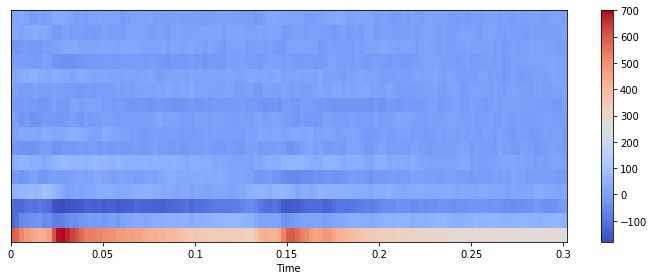

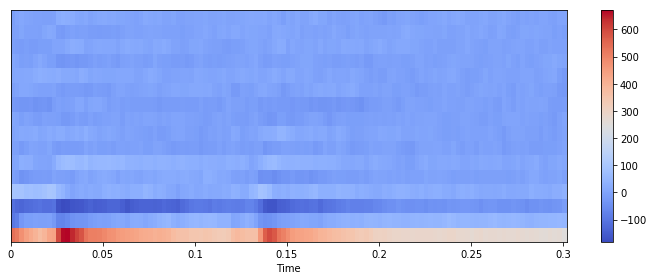

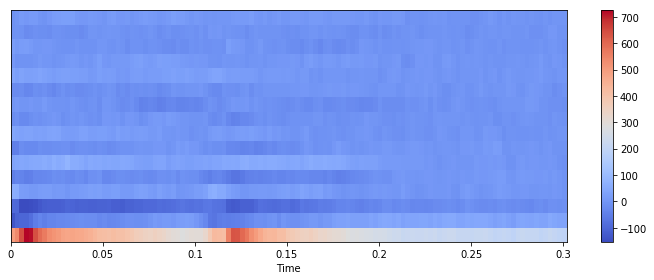

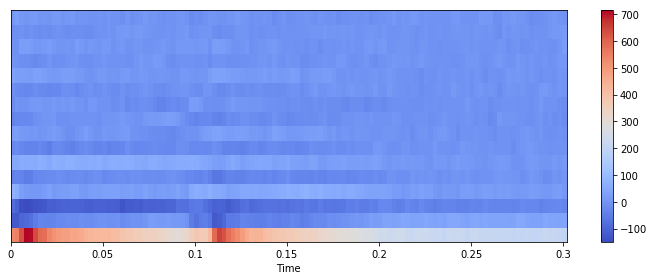

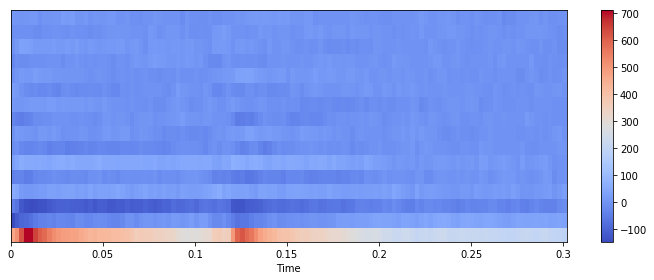

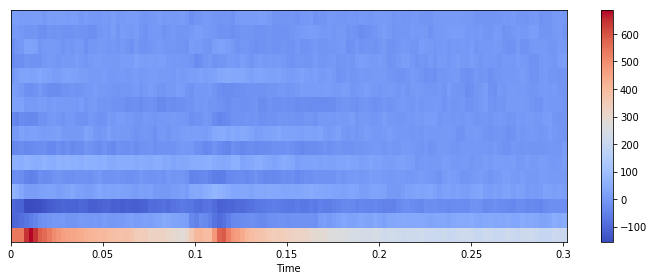

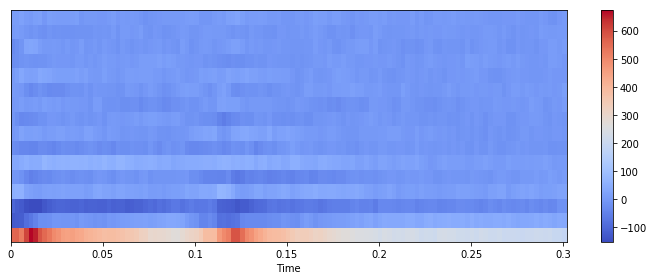

In [183]:
for i in range(5):
    draw_mfcc(spacebars[i])
for i in range(5):
    draw_mfcc(a_keys[i])
for i in range(5):
    draw_mfcc(q_keys[i])